In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

## Data Understanding

First, we provide a general view to our data. for example, what kind of developer they are and where are they come from. Also, let's have a quick look on their employment status and how they think about their salary.

In [2]:
#Read the data and glimpse it
calendar = pd.read_csv("/Users/alisalem/Downloads/boston/calendar.csv")
listings = pd.read_csv("/Users/alisalem/Downloads/boston/listings.csv")
reviews = pd.read_csv("/Users/alisalem/Downloads/boston/reviews.csv")

In [3]:
calendar.shape
calendar.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [4]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [5]:
pd.set_option("display.max_columns", 100)
listings.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United Sta

In [6]:
#Checking the missing values
listings.columns[listings.isnull().any()]

Index(['summary', 'space', 'neighborhood_overview', 'notes', 'transit',
       'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url',
       'xl_picture_url', 'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_neighbourhood',
       'neighbourhood', 'neighbourhood_group_cleansed', 'city', 'zipcode',
       'market', 'property_type', 'bathrooms', 'bedrooms', 'beds',
       'square_feet', 'weekly_price', 'monthly_price', 'security_deposit',
       'cleaning_fee', 'has_availability', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'jurisdiction_names',
       'reviews_per_month'],
      dtype='object')

Data has in total 3585 rows and 95 features.
53.68% of the features don't have missing values


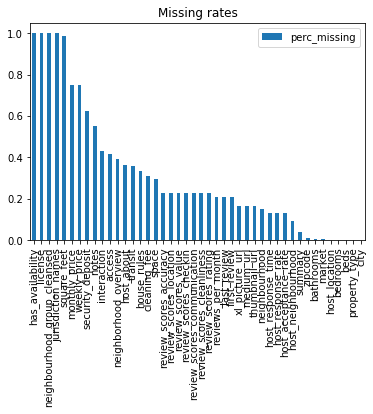

In [7]:
print(f"Data has in total {listings.shape[0]} rows and {listings.shape[1]} features.")
missing_rates = pd.DataFrame(listings.isna().mean())\
        .rename({0:'perc_missing'}, axis=1)\
        .sort_values('perc_missing', ascending=False)
print("{}% of the features don't have missing values"\
          .format(round(sum(missing_rates['perc_missing']==0)*100/len(missing_rates), 2)))
missing_rates[missing_rates['perc_missing']>0].plot.bar(title="Missing rates")

# Question 1

What are the busiest times to visit Boston? -What is the seasonal pattern of Airbnb housing price? -What is the weekly pattern of Airbnb housing price? -Which areas have the highest average Airbnb housing price? And which areas have the lowest average Airbnb housing price?

## Exploer seasonal pattern of listing prices: How does price changes in each month?

In [8]:
split=pd.DataFrame()
split['year']=pd.to_datetime(calendar['date']).dt.year
split['month']=pd.to_datetime(calendar['date']).dt.month
split['dayofweek']=pd.to_datetime(calendar['date']).dt.dayofweek
split.head()
new_calendar=calendar.join(split,on=None,how='left',sort=False)

In [9]:
new_calendar[new_calendar['available']=='t']

,listing_id,date,available,price,year,month,dayofweek
365,3075044,2017-08-22,t,$65.00,2017,8,1
366,3075044,2017-08-21,t,$65.00,2017,8,0
367,3075044,2017-08-20,t,$65.00,2017,8,6
368,3075044,2017-08-19,t,$75.00,2017,8,5
369,3075044,2017-08-18,t,$75.00,2017,8,4
...,...,...,...,...,...,...,...
1308875,14504422,2016-09-20,t,$62.00,2016,9,1
1308876,14504422,2016-09-19,t,$62.00,2016,9,0
1308877,14504422,2016-09-18,t,$62.00,2016,9,6
1308878,14504422,2016-09-17,t,$62.00,2016,9,5


In [10]:
new_calendar['price']=new_calendar['price'].str.replace('$','')

In [11]:
new_calendar['price']=pd.to_numeric(new_calendar['price'],errors='coerce')


In [12]:
new_calendar[new_calendar['available']=='t']

,listing_id,date,available,price,year,month,dayofweek
365,3075044,2017-08-22,t,65.0,2017,8,1
366,3075044,2017-08-21,t,65.0,2017,8,0
367,3075044,2017-08-20,t,65.0,2017,8,6
368,3075044,2017-08-19,t,75.0,2017,8,5
369,3075044,2017-08-18,t,75.0,2017,8,4
...,...,...,...,...,...,...,...
1308875,14504422,2016-09-20,t,62.0,2016,9,1
1308876,14504422,2016-09-19,t,62.0,2016,9,0
1308877,14504422,2016-09-18,t,62.0,2016,9,6
1308878,14504422,2016-09-17,t,62.0,2016,9,5


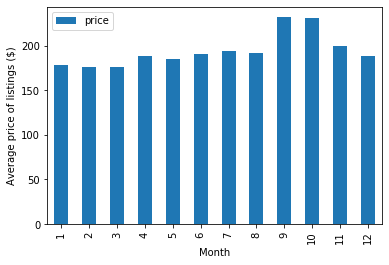

In [13]:
%matplotlib inline
priceMonth=new_calendar[['month','price']]
priceMonth_mean=priceMonth.groupby('month').mean()
plot1=priceMonth_mean.plot(kind='bar')
plot1.set_xlabel('Month')
plot1.set_ylabel('Average price of listings ($)')
plot1

In [14]:
priceMonth_mean

,price
month,
1,178.812539
2,176.332492
3,176.459238
4,188.370175
5,185.292694
6,190.662144
7,194.293234
8,191.822004
9,232.270021


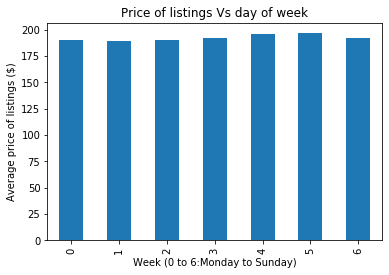

In [15]:
priceWeek=new_calendar[['dayofweek','price']]
priceWeek_mean=priceWeek.groupby('dayofweek').mean()
plot3=priceWeek_mean.plot(kind='bar',legend=None)
plot3.set_xlabel('Week (0 to 6:Monday to Sunday)')
plot3.set_ylabel('Average price of listings ($)')
plot3.set_title('Price of listings Vs day of week')
plot3

In [16]:
priceWeek_mean

,price
dayofweek,
0,190.340846
1,189.564788
2,190.028529
3,192.178989
4,196.211677
5,196.578287
6,192.407112


The listing prices on Friday and Saturday are slightly more expensive than the rest of the week.

Conclusion

If you are traveling on budget and still interested in visiting Boston, my advice is try to visit Boston on weekdays and avoild both September and Octorber.

# Question 2

What’s the home availability pattern?

In [17]:
calendar['date'] = pd.to_datetime(calendar['date'])


In [18]:
avaliableCount = calendar.groupby('date').apply(lambda x: x.notnull().sum())[['price']]
avaliableCount = avaliableCount.rename({"price":"total_available_houses"},axis='columns')
avaliableCount

,total_available_houses
date,
2016-09-06,570
2016-09-07,932
2016-09-08,999
2016-09-09,981
2016-09-10,956
...,...
2017-09-01,1795
2017-09-02,1798
2017-09-03,1802


In [19]:
# everyday average prices
calendarNew = calendar[calendar.price.notnull()]

calendarNew['price']=calendarNew['price'].str.replace('$','')
calendarNew['price']=pd.to_numeric(calendarNew['price'],errors='coerce')

#to_datetime = lambda x: datetime.datetime.strptime(str(x),'%Y-%m-%d')
#calendar.date = calendar.date.apply(to_datetime)
avaliableCount.index


/Users/alisalem/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/alisalem/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


DatetimeIndex(['2016-09-06', '2016-09-07', '2016-09-08', '2016-09-09',
               '2016-09-10', '2016-09-11', '2016-09-12', '2016-09-13',
               '2016-09-14', '2016-09-15',
               ...
               '2017-08-27', '2017-08-28', '2017-08-29', '2017-08-30',
               '2017-08-31', '2017-09-01', '2017-09-02', '2017-09-03',
               '2017-09-04', '2017-09-05'],
              dtype='datetime64[ns]', name='date', length=365, freq=None)

In [20]:
# average house price for boston everyday


averagePrice = calendarNew.groupby('date').mean()[['price']]
# change column name
averagePrice = averagePrice.rename({"price":"average_prices"},axis='columns')
averagePrice.index





DatetimeIndex(['2016-09-06', '2016-09-07', '2016-09-08', '2016-09-09',
               '2016-09-10', '2016-09-11', '2016-09-12', '2016-09-13',
               '2016-09-14', '2016-09-15',
               ...
               '2017-08-27', '2017-08-28', '2017-08-29', '2017-08-30',
               '2017-08-31', '2017-09-01', '2017-09-02', '2017-09-03',
               '2017-09-04', '2017-09-05'],
              dtype='datetime64[ns]', name='date', length=365, freq=None)

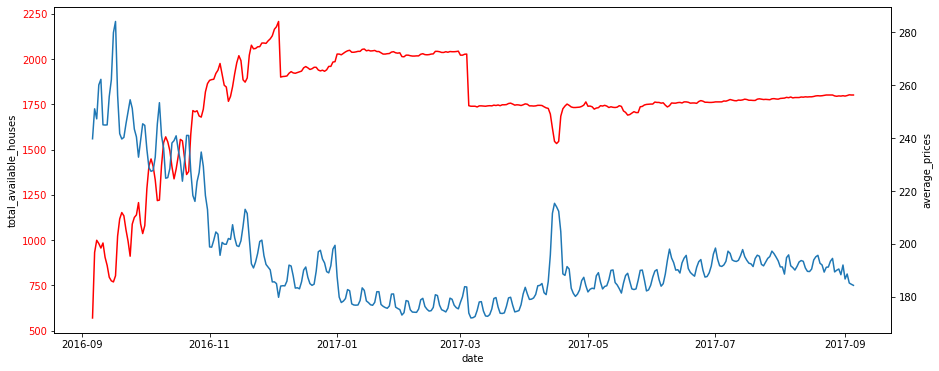

In [21]:
%matplotlib inline
f, ax = plt.subplots(figsize=(15, 6))
plt1 = sns.lineplot(x = avaliableCount.index,y = 'total_available_houses', 
                  data = avaliableCount,color="r",legend=False)
for tl in ax.get_yticklabels():
    tl.set_color('r')

ax2 = ax.twinx()
plt2 = sns.lineplot(x = averagePrice.index,y = 'average_prices',
                    data=averagePrice, ax=ax2,linestyle=':', legend=False)

### Figure Findings

Total available houses:

Availability is not stable all year round.
Increase from Sep to Nov.
Remain relatively stable from 01/2017-09/2017, although the reason why there are two sudden drop of home supply is unclear.
Average prices:

Price drop as home supply increase from 09/2016 to 12/2016.
The sudden drop of supply in 03/2017 dose not drive price up;However the sudden drop of supply before 05/2017 just rocket price up. So I guess it has something to do with demand change.
There seems to have a small periodical price moving circle and this maybe correspond to weekends.

In [22]:
listings['price']=listings['price'].str.replace('$','')
listings['price']=pd.to_numeric(listings['price'],errors='coerce')

In [23]:
listingsPrice = listings[listings.price.notnull()]


In [24]:
def plot_price_by_cat(colname,listings=listings,fig_row_size=11,fig_col_size=9):
    price_col = listingsPrice.groupby(colname).mean()[['price']]
    price_col.reset_index(inplace=True)
    f, ax = plt.subplots(figsize=(fig_row_size, fig_col_size))
    sns.barplot(y=colname,x='price',data=price_col.sort_values(by='price', ascending=False))

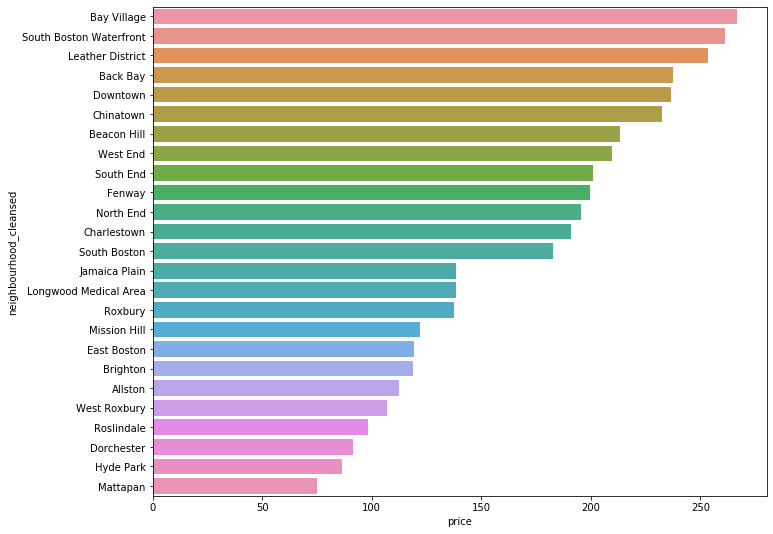

In [25]:
plot_price_by_cat('neighbourhood_cleansed',listings=listingsPrice)

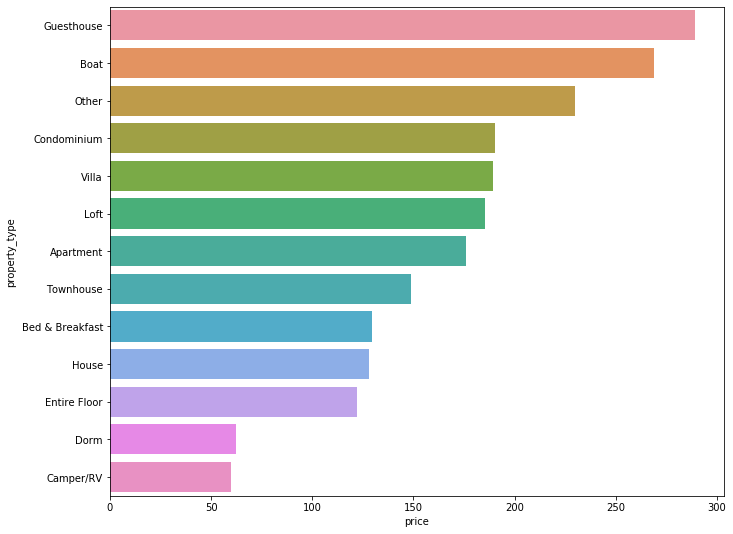

In [26]:
plot_price_by_cat('property_type',listings=listingsPrice)


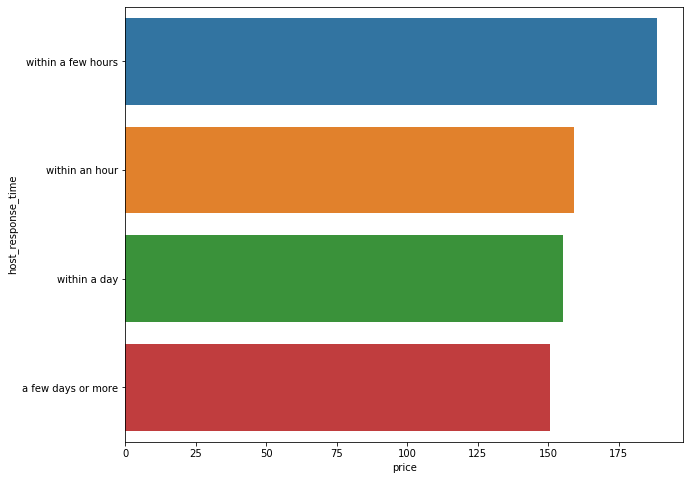

In [27]:
plot_price_by_cat('host_response_time',listings=listingsPrice,fig_row_size=10,fig_col_size=8)

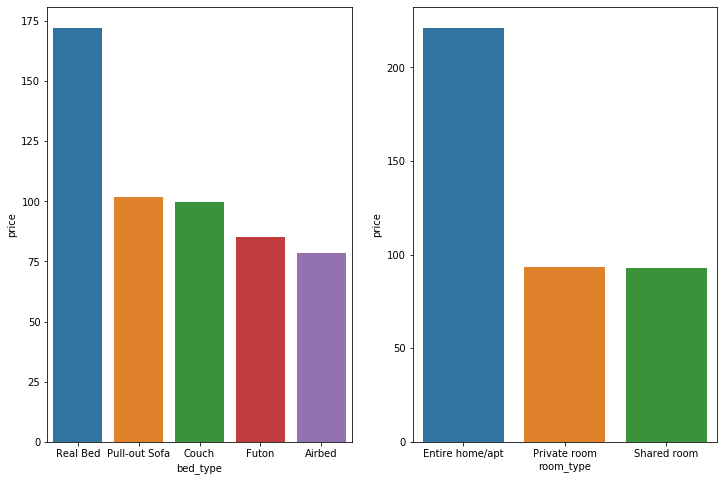

In [28]:
# price and bed_type
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
price_bed_type = listingsPrice.groupby('bed_type').mean()[['price']]
price_bed_type.reset_index(inplace=True)
sns.barplot(x='bed_type',y='price',data=price_bed_type.sort_values(by='price', ascending=False),ax=ax1)
# price and bed_type
price_room_type = listingsPrice.groupby('room_type').mean()[['price']]
price_room_type.reset_index(inplace=True)
sns.barplot(x='room_type',y='price',data=price_room_type.sort_values(by='price', ascending=False),ax=ax2)